In [1]:
#Logistic Regression

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('diabetes2.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.shape

(768, 9)

In [6]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
x = data.iloc[:,:-1].values

In [9]:
y = data.Outcome

In [10]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [12]:
from scipy import stats
data_zscore = data[(np.abs(stats.zscore(data))<3).all(axis = 1)]

In [13]:
def remove_outliers(data,columns,n_std):
    for col in columns:
        print('working on column : {}'.format(col))
        
        mean = data[col].mean()
        sd = data[col].std()
        
        data = data[(data[col] <= mean+(n_std*sd))]
    return data

In [14]:
columns = data.columns
n_std = 4
data_no_outliers = remove_outliers(data_zscore,columns,n_std)

working on column : Pregnancies
working on column : Glucose
working on column : BloodPressure
working on column : SkinThickness
working on column : Insulin
working on column : BMI
working on column : DiabetesPedigreeFunction
working on column : Age
working on column : Outcome


In [15]:
data_no_outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
data_no_outliers.shape

(687, 9)

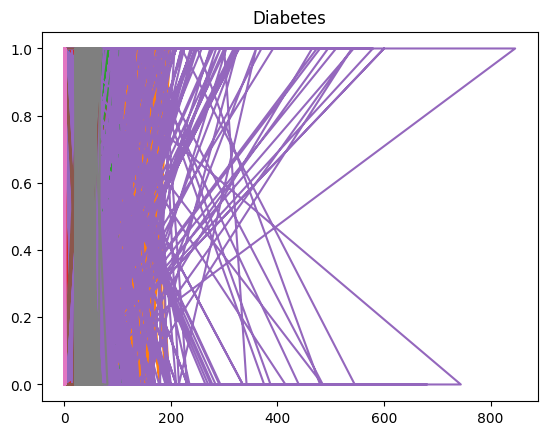

In [17]:
plt.plot(x,y)
plt.title("Diabetes")
plt.show()

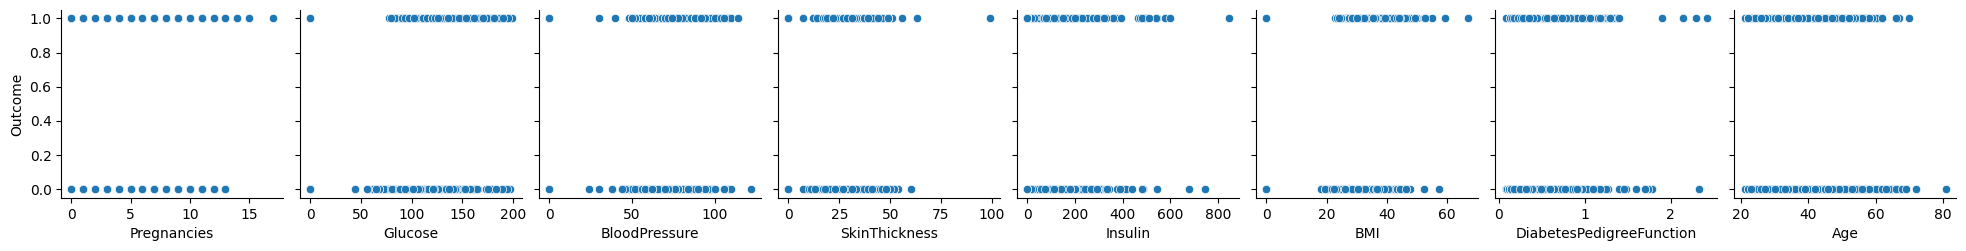

In [18]:
sns.pairplot(data,x_vars = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],y_vars = 'Outcome',kind = 'scatter', diag_kind = None)

In [19]:
import sklearn

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0,train_size = 0.70)

In [22]:
x_train

array([[0.00e+00, 1.51e+02, 9.00e+01, ..., 4.21e+01, 3.71e-01, 2.10e+01],
       [1.00e+00, 8.30e+01, 6.80e+01, ..., 1.82e+01, 6.24e-01, 2.70e+01],
       [2.00e+00, 1.22e+02, 7.00e+01, ..., 3.68e+01, 3.40e-01, 2.70e+01],
       ...,
       [4.00e+00, 9.40e+01, 6.50e+01, ..., 2.47e+01, 1.48e-01, 2.10e+01],
       [1.10e+01, 8.50e+01, 7.40e+01, ..., 3.01e+01, 3.00e-01, 3.50e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]])

In [23]:
y_train

580    1
418    0
764    0
363    1
757    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 537, dtype: int64

In [24]:
from sklearn import linear_model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()

In [27]:
from sklearn.preprocessing import StandardScaler   

In [28]:
st_x= StandardScaler() 

In [29]:
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)

In [30]:
model.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_predicted = model.predict(x_test)

In [32]:
y_predicted

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mse = mean_squared_error(y_test,y_predicted)

In [35]:
mse

0.22077922077922077

In [36]:
from sklearn.metrics import mean_absolute_error

In [37]:
mae = mean_absolute_error(y_test,y_predicted)

In [38]:
mae

0.22077922077922077

In [39]:
from sklearn.metrics import mean_absolute_percentage_error

In [40]:
mape = mean_absolute_percentage_error(y_test,y_predicted)

In [41]:
mape

311937636527826.7

In [42]:
accuracy = 100-mape

In [43]:
accuracy

-311937636527726.7

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_predicted))
print(classification_report(y_test,y_predicted))
print(accuracy_score(y_test,y_predicted))

[[141  16]
 [ 35  39]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

0.7792207792207793


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy = accuracy_score(y_test,y_predicted)
print(accuracy*100)

77.92207792207793


In [47]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_predicted)

In [48]:
cm

array([[141,  16],
       [ 35,  39]], dtype=int64)